<a href="https://colab.research.google.com/github/PuruBhatnagar1197/Machine-Learning-Revision/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptron trick code

In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [94]:
x, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

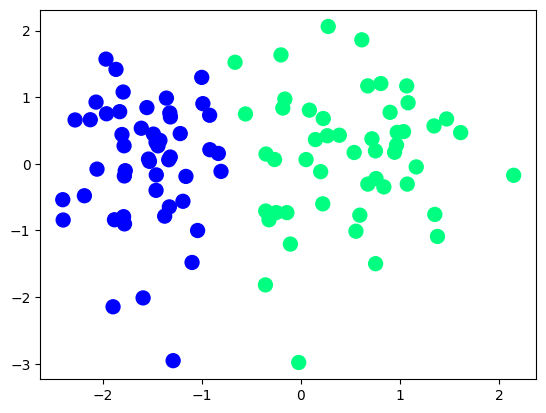

In [95]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [96]:
def boundary_function(a):
    if a>0:
        return 1
    else:
        return 0

In [99]:
def preceptron(x,y):
    x=np.insert(x,0,1,axis=1)
    w=np.ones(x.shape[1])
    lr=0.1
    for i in range(1000):
        j=np.random.randint(0,100)
        y_pred=boundary_function(np.dot(x[j],w))
        w=w+lr*(y[j]-y_pred)*x[j] ##  this is imp
    return w[0], w[1:]


In [100]:
intercept,weights=preceptron(x,y)
print(intercept)
print(weights)

0.9
[1.38076145 0.1365158 ]


In [101]:
### now since we have to plot the line but how we have cal logis regre line is in the form AX+BY+C
### we have to get it in the form y=mx+b form so m value will be (-A/B) AND b will be (-C/B)

m=-(weights[0]/weights[1])
b=-(intercept/weights[1])



In [102]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

In [103]:
y_input

array([ 23.75025002,  23.13726227,  22.52427452,  21.91128677,
        21.29829903,  20.68531128,  20.07232353,  19.45933578,
        18.84634803,  18.23336028,  17.62037253,  17.00738478,
        16.39439703,  15.78140928,  15.16842153,  14.55543378,
        13.94244604,  13.32945829,  12.71647054,  12.10348279,
        11.49049504,  10.87750729,  10.26451954,   9.65153179,
         9.03854404,   8.42555629,   7.81256854,   7.1995808 ,
         6.58659305,   5.9736053 ,   5.36061755,   4.7476298 ,
         4.13464205,   3.5216543 ,   2.90866655,   2.2956788 ,
         1.68269105,   1.0697033 ,   0.45671555,  -0.15627219,
        -0.76925994,  -1.38224769,  -1.99523544,  -2.60822319,
        -3.22121094,  -3.83419869,  -4.44718644,  -5.06017419,
        -5.67316194,  -6.28614969,  -6.89913744,  -7.51212518,
        -8.12511293,  -8.73810068,  -9.35108843,  -9.96407618,
       -10.57706393, -11.19005168, -11.80303943, -12.41602718,
       -13.02901493, -13.64200268, -14.25499043, -14.86

(-3.0, 2.0)

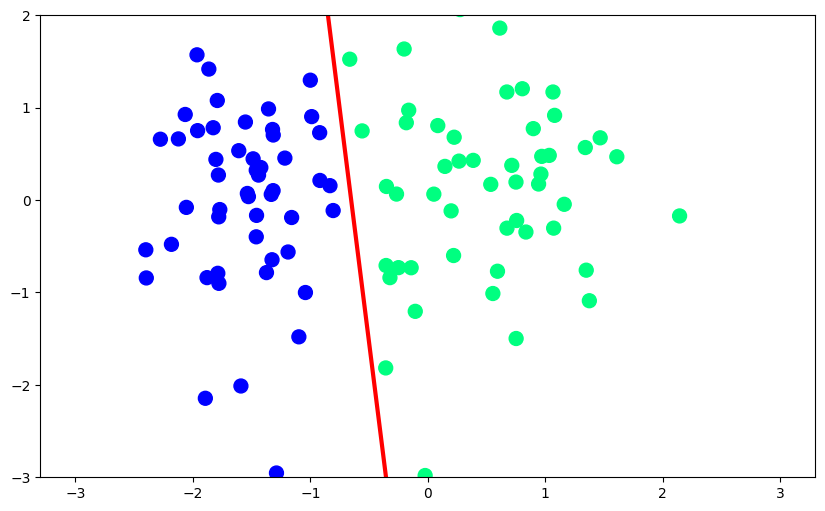

In [105]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [110]:
### now taking m and b value in above code to get the different m and b value and see how the line is moving
def perceptron_cap_m_b(x,y):
    m=[]
    b=[]
    x=np.insert(x,0,1,axis=1)
    weights=np.ones(x.shape[1])
    lr=0.01
    for i in range(1000):
        j=np.random.randint(0,x.shape[0])
        y_pred=boundary_function(np.dot(x[j],weights))
        weights=weights+lr*(y[j]-y_pred)*x[j]
        m.append(-(weights[0]/weights[1]))
        b.append(-(intercept/weights[1]))
    return m, b




In [111]:
m,b = perceptron_cap_m_b(x,y)

In [114]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

<IPython.core.display.Javascript object>

In [116]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [118]:
m=-(lr.coef_[0][0]/lr.coef_[0][1])
b=-(lr.intercept_/lr.coef_[0][1])

In [119]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

In [121]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

<IPython.core.display.Javascript object>

(-3.0, 2.0)

### second part of the notebook

In [ ]:
### in this rather than using boundary_function function we can just change it with sigmoid function
# def perceptron_cap_m_b(x,y):
#     m=[]
#     b=[]
#     x=np.insert(x,0,1,axis=1)
#     weights=np.ones(x.shape[1])
#     lr=0.01
#     for i in range(1000):
#         j=np.random.randint(0,x.shape[0])
#         y_pred=boundary_function(np.dot(x[j],weights)) #### change this line to sigmoid(np.dot(x[j],weights))
#         weights=weights+lr*(y[j]-y_pred)*x[j]
#         m.append(-(weights[0]/weights[1]))
#         b.append(-(intercept/weights[1]))
#     return m, b



In [122]:
def sigmoid(a):
    return 1/(1+np.exp(-a))